In [11]:
import torch
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt
import torch
import os
import torch.nn as nn


## Loading Models and Testing:

Neural Network:

In [12]:
class kryptonite_nn(nn.Module):
    def __init__(self, model_struct):
        super().__init__()
        self.layer1 = nn.Linear(model_struct[0], model_struct[1])
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(model_struct[1], model_struct[2])
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(model_struct[2], model_struct[3])
        self.act3= nn.ReLU()
        self.output = nn.Linear(model_struct[3], model_struct[4])
        self.act_output = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act_output(self.output(x))
        return x


class KryptoniteModel_n30(nn.Module):
    def __init__(self, structure):
        super().__init__()
        self.layer1 = nn.Linear(structure[0], structure[1])
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(structure[1], structure[2])
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(structure[2], structure[3])
        self.act3 = nn.ReLU()
        self.layer4 = nn.Linear(structure[3], structure[4])
        self.act4 = nn.ReLU()
        self.output = nn.Linear(structure[4], structure[5])
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act4(self.layer4(x))
        x = self.act_output(self.output(x))
        
        return x


class KryptoniteModel_n12(nn.Module):
    def __init__(self, structure):
        super().__init__()
        self.layer1 = nn.Linear(structure[0], structure[1])
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(structure[1], structure[2])
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(structure[2], structure[3])
        self.act3 = nn.ReLU()
        self.output = nn.Linear(structure[3], structure[4])
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.act_output(self.output(x))
        
        return x

In [103]:
# Data investigation
n_to_test = [9, 12, 15]
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

class KryptoniteN:
    def __init__(self, n_to_test, device):
        self.batch_size = 100
        self.n_to_test = n_to_test
        self.models_to_load = {9: "saved_models\\model_full_n9_s9-15-10-4-1_100_0.07_500.pth", 
                               12: "saved_models\\model_full_n12_s12-15-10-4-1_100_0.07_500.pth",
                               15: "saved_models\\model_full_n15_s15_15_10_4_1.pth"
        }
        self.model_path = self.models_to_load[n_to_test]
        self.device = device

    def load_model(self):
        self.model = torch.load(self.model_path)

    def load_data(self):
        x_file_path = 'Datasets/kryptonite-' + str(self.n_to_test) + '-X.npy'
        y_file_path = 'Datasets/kryptonite-' + str(self.n_to_test) + '-y.npy'

        x_raw = torch.tensor(np.load(x_file_path), dtype=torch.float32)
        y_raw = torch.tensor(np.load(y_file_path), dtype=torch.float32)

        row_count = x_raw.shape[0]
        print(f"Row count: {row_count}")

        X_train, X_test = torch.tensor_split(
            x_raw,
            [round(row_count * 0.8)],
            dim=0
        )

        y_train, y_test = torch.tensor_split(
            y_raw,
            [round(row_count * 0.8)],
            dim=0
        )

        train_dataset = torch.utils.data.TensorDataset(
            X_train.to(self.device),
            y_train.to(self.device)
        )
        test_dataset = torch.utils.data.TensorDataset(
            X_test.to(self.device),
            y_test.to(self.device)
        )
        
        self.loaders = {
            'train': torch.utils.data.DataLoader(
                train_dataset,
                batch_size=self.batch_size,
                shuffle=True,
                num_workers=0
            ),
            'test': torch.utils.data.DataLoader(
                test_dataset,
                batch_size=self.batch_size,
                shuffle=True,
                num_workers=0
            )
        }
    
    def predict_hidden(self):
        self.model.eval()
        hidden_x_path = "Datasets/hidden-kryptonite-%s-X.npy"%(self.n_to_test)

        x_raw = torch.tensor(np.load(hidden_x_path), dtype=torch.float32)
        x_raw = x_raw.to(self.device)
        model = self.model.to(self.device)
        output = model(x_raw)
        output = output.cpu().detach()

        file_path = "hiddenlabels/y_predicted_%s.npy"%(self.n_to_test)
        np.save(file_path, output)
        print(output.shape)

    def eval_model(self):
        self.model.eval()
        accuracy = np.array([])
        loader_to_use = 'test'
        with torch.no_grad():
            for data in self.loaders[loader_to_use]:
                x, labels = data
                self.model = self.model.to(self.device)
                output = self.model(x)
                output = output.cpu()
                labels = labels.cpu()
                accuracy = np.concatenate((accuracy, torch.eq(torch.flatten(output.round()), labels).numpy()))

        accuracy = accuracy.mean()

        print(f"Accuracy is: {accuracy * 100:.2f}%")

    def evaluate_model(self):
        self.load_model()
        self.load_data()
        self.eval_model()

pipeline = KryptoniteN(9, device)
pipeline.evaluate_model()
pipeline.predict_hidden()

Device: cuda
Row count: 18000
Accuracy is: 95.31%
torch.Size([10000, 1])


C:\Users\Martin\AppData\Local\Temp\ipykernel_12376\135443665.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model = torch.load(self.model_path)


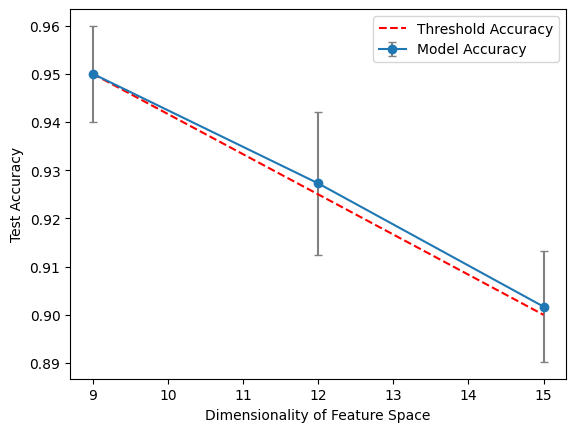

In [91]:
# 15: 90.80%
# 12: 94.19%
# 9: 95.31%

n_15 = [0.908, 0.904, 0.880, 0.9135, 0.903]
n_12 = [0.9285, 0.9419, 0.935, 0.899, 0.932]
n_9 = [0.954, 0.9581, 0.942, 0.935, 0.961]

variance = [np.std(n_9), np.std(n_12), np.std(n_15)]

n_values = [9, 12, 15]
accuracy = [np.mean(n_9), np.mean(n_12), np.mean(n_15)]
threshold_acc = [0.95, 0.925, 0.90]

# plt.plot(n_values, accuracy, marker='o', label="Model Accuracy")
plt.errorbar(n_values, accuracy, yerr=variance, ecolor="grey", marker="o", capsize=3, label="Model Accuracy")
plt.plot(n_values, threshold_acc, linestyle='--', color='r', label='Threshold Accuracy')
plt.xlabel("Dimensionality of Feature Space")
plt.ylabel("Test Accuracy")
plt.legend(loc='best')
plt.savefig("data_imgs/nn.png")

(18000, 9)


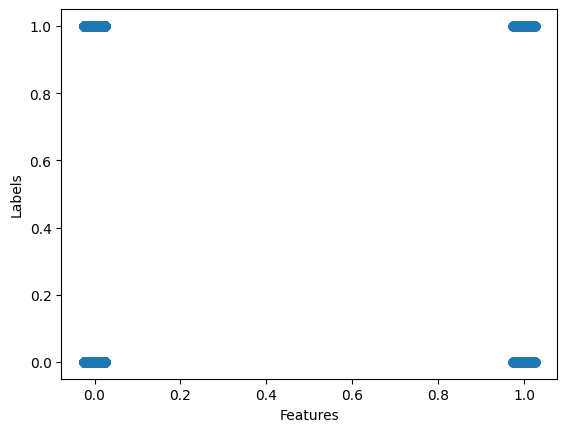

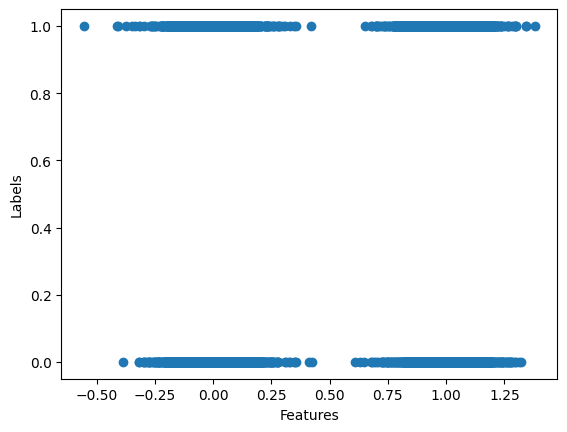

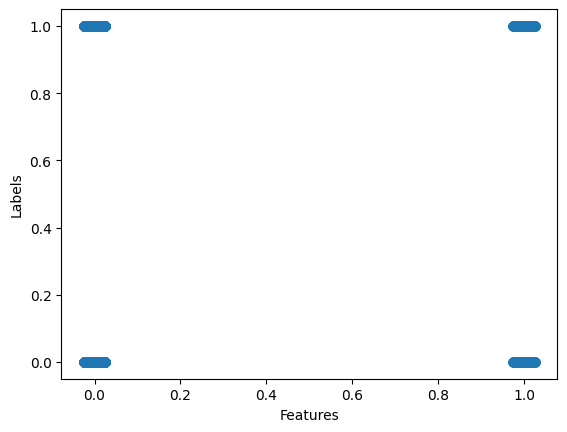

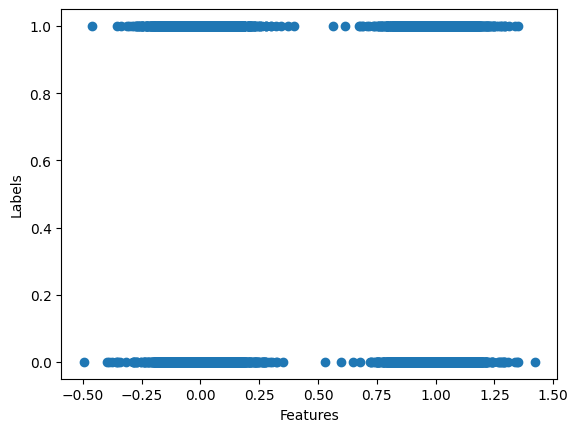

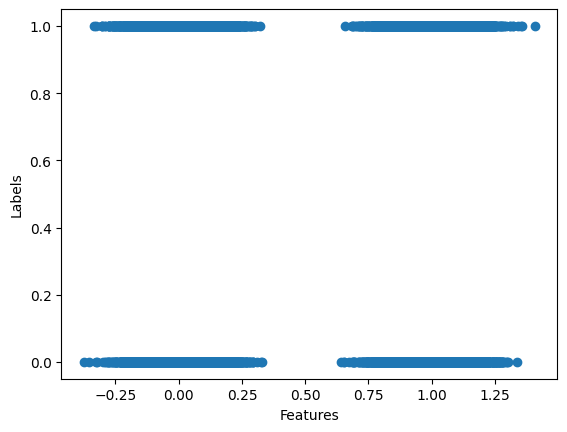

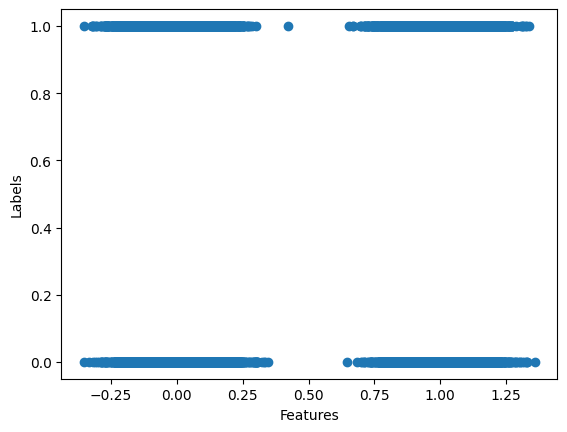

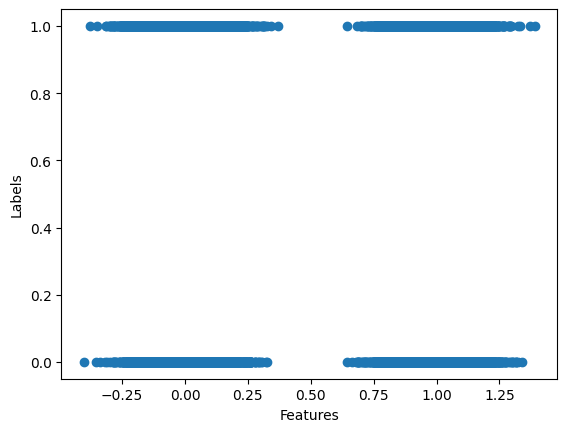

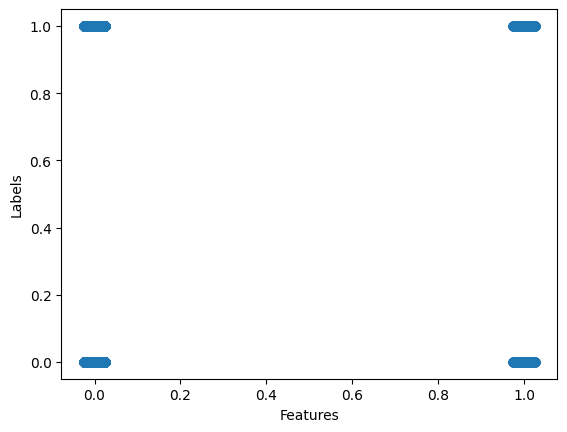

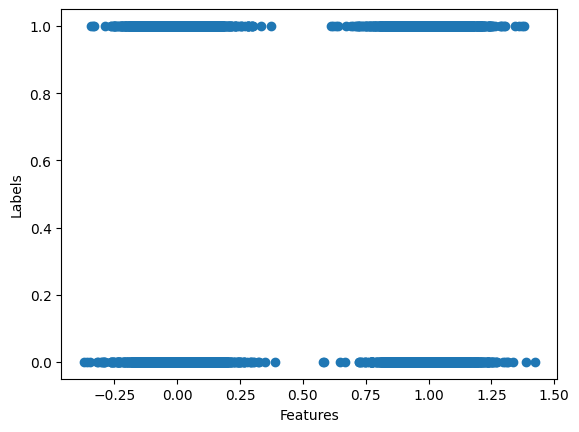

In [49]:
# Data investigation:

def load_data(n):
    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    print(X.shape)
    for n in range(X.shape[1]):
        plt.scatter(X[:, n], y)
        plt.xlabel("Features")
        plt.ylabel("Labels")
        plt.savefig(f'data{n}.png')
        plt.show()

load_data(9)